<a href="https://www.kaggle.com/code/julianacorts/us-census-data-preparation-exploration-tutorial?scriptVersionId=135864276" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

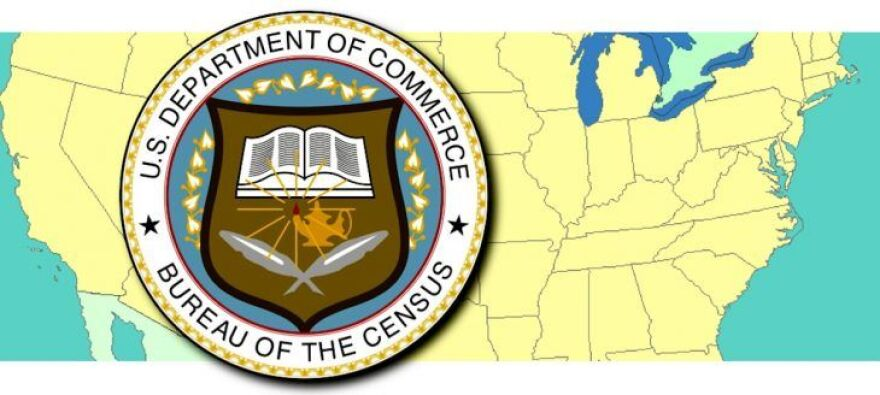

# Dataset description

The US Adult Census dataset is a repository of 48,842 entries drawn from the 1994 Census database.

**Further description of the data:** http://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf

The Census Income dataset has 48,842 entries. Each entry contains the following information
about an individual:
* age: the age of an individual
○ Integer greater than 0
* workclass: a general term to represent the employment status of an individual
○ Private, Self­emp­not­inc, Self­emp­inc, Federal­gov, Local­gov, State­gov,
Without­pay, Never­worked.
* fnlwgt: final weight. In other words, this is the number of people the census believes
the entry represents..
○ Integer greater than 0
* education: the highest level of education achieved by an individual.
○ Bachelors, Some­college, 11th, HS­grad, Prof­school, Assoc­acdm, Assoc­voc,
9th, 7th­8th, 12th, Masters, 1st­4th, 10th, Doctorate, 5th­6th, Preschool.
* education­num: the highest level of education achieved in numerical form.
○ Integer greater than 0
* marital­status: marital status of an individual. Married­civ­spouse corresponds to a
civilian spouse while Married­AF­spouse is a spouse in the Armed Forces.
○ Married­civ­spouse, Divorced, Never­married, Separated, Widowed,
Married­spouse­absent, Married­AF­spouse.
* occupation: the general type of occupation of an individual
○ Tech­support, Craft­repair, Other­service, Sales, Exec­managerial,
Prof­specialty, Handlers­cleaners, Machine­op­inspct, Adm­clerical,
Farming­fishing, Transport­moving, Priv­house­serv, Protective­serv,
Armed­Forces.
* relationship: represents what this individual is relative to others. For example an
individual could be a Husband. Each entry only has one relationship attribute and is
somewhat redundant with marital status. We might not make use of this attribute at all
○ Wife, Own­child, Husband, Not­in­family, Other­relative, Unmarried.
* race: Descriptions of an individual’s race
○ White, Asian­Pac­Islander, Amer­Indian­Eskimo, Other, Black.
* sex: the biological sex of the individual
○ Male, Female
* capital­gain: capital gains for an individual
○ Integer greater than or equal to 0
* capital­loss: capital loss for an individual
○ Integer greater than or equal to 0
* hours­per­week: the hours an individual has reported to work per week
○ continuous.
* native­country: country of origin for an individual
○ United­States, Cambodia, England, Puerto­Rico, Canada, Germany,
Outlying­US(Guam­USVI­etc), India, Japan, Greece, South, China, Cuba, Iran,
Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,
Ireland, France, Dominican­Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,
Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El­Salvador,
Trinadad&Tobago, Peru, Hong, Holand­Netherlands.
* the label: whether or not an individual makes more than $50,000 annually.
○ <=50k, >50k

# Objetives

Apply the concepts of data preparation and exploration of a dataset using the Python programming language, based on the CRISP-DM methodology.

# Data preparation

# 1. Import the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# Read data from CSV file
df=pd.read_csv('/kaggle/input/us-census-of-adults-1994/adult.data.csv')

# 2. Data exploration

## 2.1 Data preview

In [2]:
#view some data from the dataset
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
#to know how many records and columns do we have --> 32561 records, 15 columns
df.shape

(32560, 15)

* We observe that there are no headers for the columns, we proceed to create them with the information found in the description of the database

In [4]:
#Create the headers
headers = ["age","workclass","fnlwgt","education","education_num", "marital_status","occupation",
         "relationship","race","sex", "capital_gain","capital_loss","hours_per_week","native_country","makes"]
df.columns = headers
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,makes
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## 2.2 Identify null, invalid or missing values

We must identify the symbol used to represent the missing data.

In [5]:
df.head(30)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,makes
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [6]:
#In this case, the symbol thar represent the missing values is "?"
#Let's upload the dataset again by changing the value "?" by "NaN"
missing_values=["?"]
df=pd.read_csv('/kaggle/input/us-census-of-adults-1994/adult.data.csv', sep="\s*,\s*", engine='python', header=None, na_values=missing_values)

#Create the headers again
headers = ["age","workclass","fnlwgt","education","education_num", "marital_status","occupation", 
           "relationship","race","sex", "capital_gain","capital_loss","hours_per_week","native_country","makes"]
df.columns = headers
df.head(30)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,makes
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


* The values that were in "?", have already changed to "NaN"

Let's find out which attributes have null data.

In [7]:
#to know the null data on the dataset
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
makes                0
dtype: int64

* We find null data that we must process in subsequent steps

## 2.3 Data types

In [8]:
#to know the types of the data
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
makes             object
dtype: object

* We dont have any problem with the data types. They are correct.

In [9]:
#we also can view the data types and the non-null data in ones
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  makes           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## 2.4 Duplicate values

In [10]:
#to know if we have duplicate values
df.duplicated()
print(df.duplicated())
print("Duplicate values:",df.duplicated().sum())

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool
Duplicate values: 24


* We find duplicate values that we must process in subsequent steps

## 2.5 Stadistics

In [11]:
#to know some stadistics of all the data on the dataset, including numerical and categorical data
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32561.0,NaN,NaN,NaN,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
workclass,30725,8,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561.0,NaN,NaN,NaN,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_num,32561.0,NaN,NaN,NaN,10.080679,2.57272,1.0,9.0,10.0,12.0,16.0
marital_status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,30718,14,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Data visualization

## 3.1 Univariate Analysis

### Distribution of numerical variables

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education_num'}>,
        <Axes: title={'center': 'capital_gain'}>],
       [<Axes: title={'center': 'capital_loss'}>,
        <Axes: title={'center': 'hours_per_week'}>]], dtype=object)

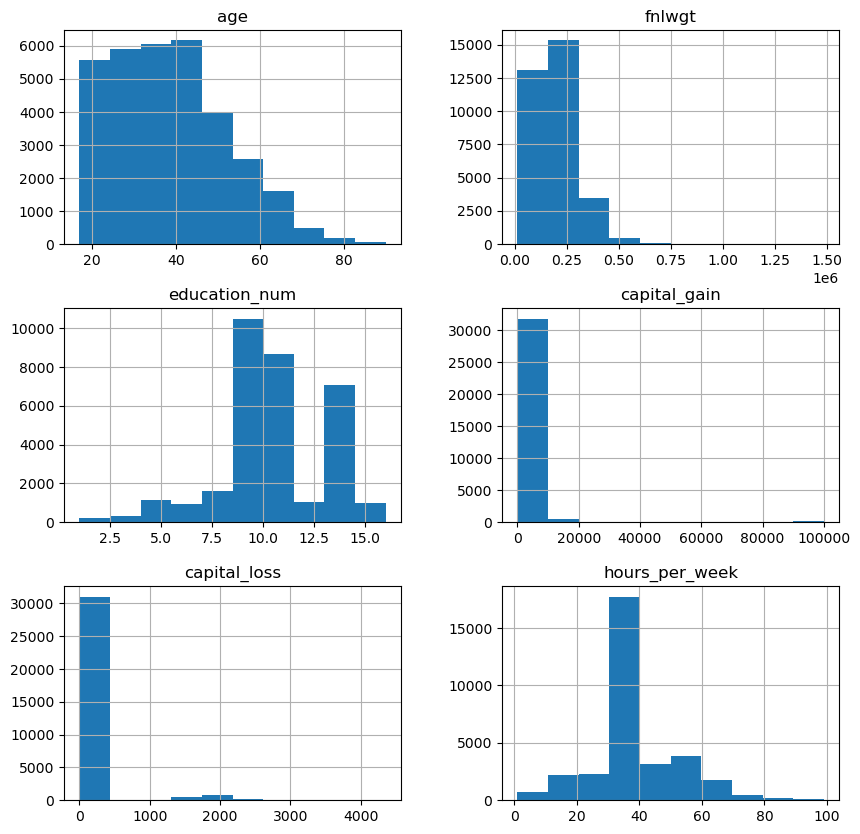

In [12]:
df.hist(figsize = (10,10))

**Age Distribution**

In [13]:
print("Min age:", df.age.min())
print("Max age:", df.age.max())

Min age: 17
Max age: 90


[Text(0.5, 1.0, 'Age Distribution')]

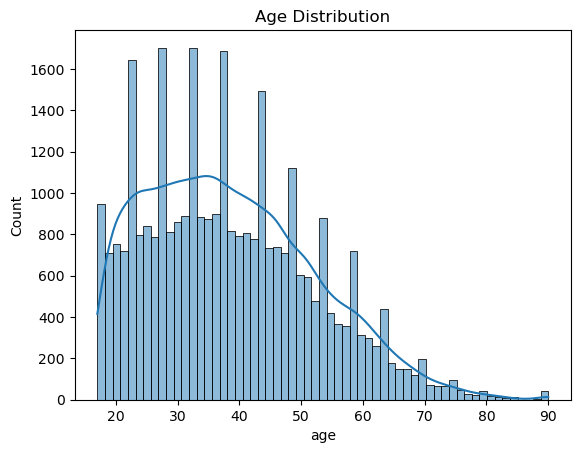

In [14]:
sns.histplot(data=df, x="age", kde=True).set(title= 'Age Distribution')

<Axes: >

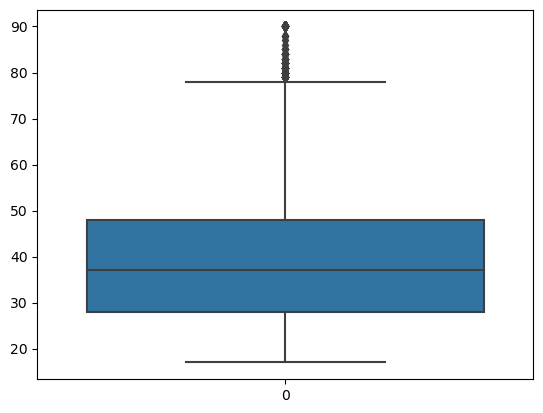

In [15]:
sns.boxplot(df.age, orient="v")

Age range is between 90 and 17. Asymmetric distribution skewed to the left. Atypical values.

**fnlwgt Distribution**

In [16]:
print("Min fnlwgt:", df.fnlwgt.min())
print("Max fnlwgt:", df.fnlwgt.max())

Min fnlwgt: 12285
Max fnlwgt: 1484705


[Text(0.5, 1.0, 'fnlwgt Distribution')]

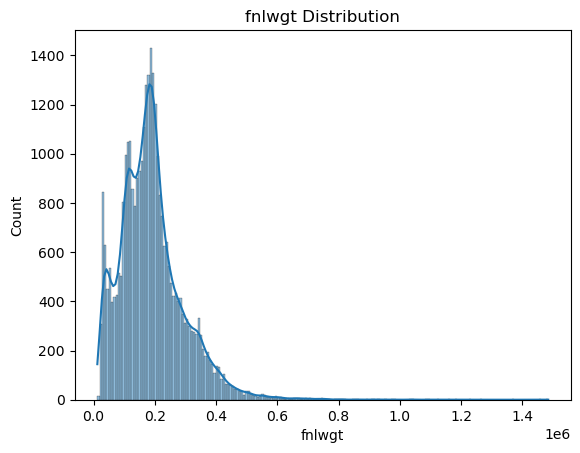

In [17]:
sns.histplot(data=df, x="fnlwgt", kde=True).set(title= 'fnlwgt Distribution')

<Axes: >

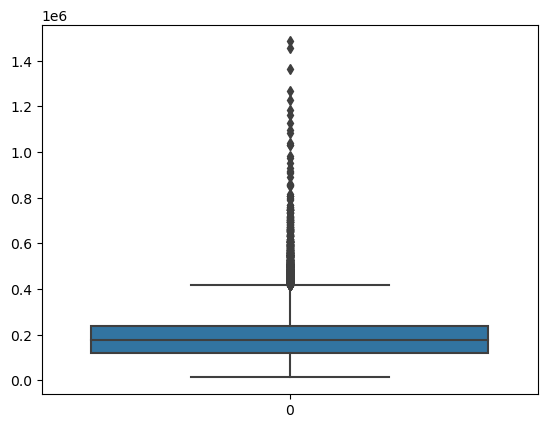

In [18]:
sns.boxplot(df.fnlwgt, orient="v")

Asymmetric distribution skewed to the left. Atypical values.

**Years of Education Distribution**

In [19]:
print("Min years of educaion:", df.education_num.min())
print("Max years of educaion:", df.education_num.max())

Min years of educaion: 1
Max years of educaion: 16


[Text(0.5, 1.0, 'Years of Educaion Distribution')]

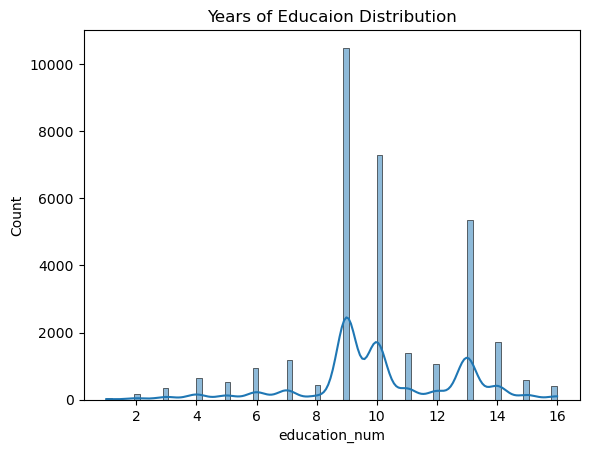

In [20]:
sns.histplot(data=df, x="education_num", kde=True).set(title= 'Years of Educaion Distribution')

<Axes: >

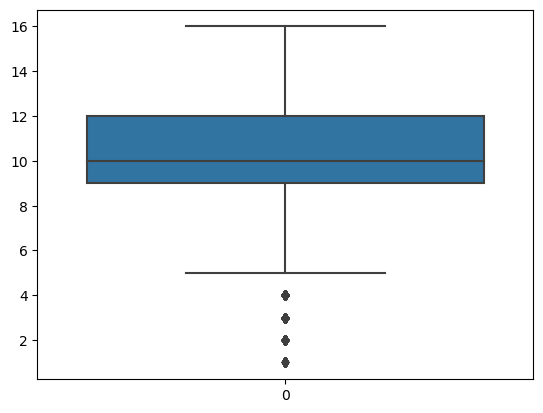

In [21]:
sns.boxplot(df.education_num, orient="v")

Asymmetric distribution. Atypical values.

**Capital Gain Distribution**

In [22]:
print("Min capital gain:", df.capital_gain.min())
print("Max capital gain:", df.capital_gain.max())

Min capital gain: 0
Max capital gain: 99999


[Text(0.5, 1.0, 'Capital Gain Distribution')]

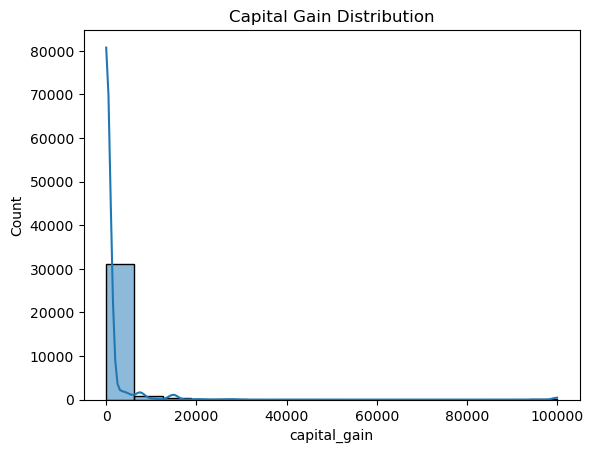

In [23]:
sns.histplot(data=df, x='capital_gain', kde=True).set(title= 'Capital Gain Distribution')

<Axes: >

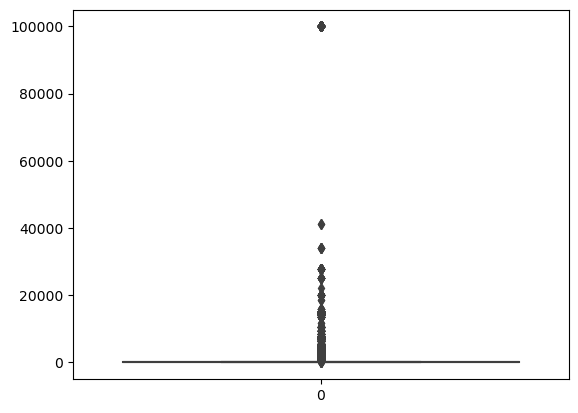

In [24]:
sns.boxplot(df.capital_gain, orient="v")

Asymmetric distribution. Atypical values.

**Capital Loss Distribution**

In [25]:
print("Min capital loss:", df.capital_loss.min())
print("Max capital loss:", df.capital_loss.max())

Min capital loss: 0
Max capital loss: 4356


[Text(0.5, 1.0, 'Capital Loss Distribution')]

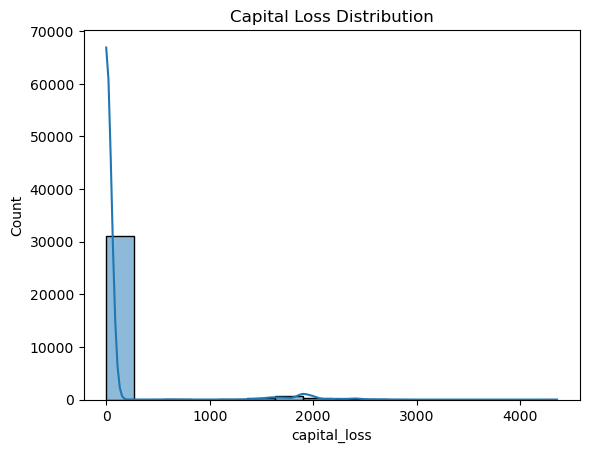

In [26]:
sns.histplot(data=df, x='capital_loss', kde=True).set(title= 'Capital Loss Distribution')

<Axes: >

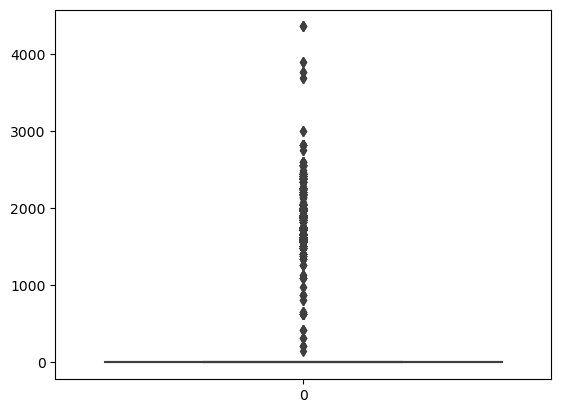

In [27]:
sns.boxplot(df.capital_loss, orient="v")

Asymmetric distribution. Atypical values.

**Hours Worked per Week Distribution**

In [28]:
print("Min hours worked per week:", df.hours_per_week.min())
print("Max hours worked per week:", df.hours_per_week.max())

Min hours worked per week: 1
Max hours worked per week: 99


[Text(0.5, 1.0, 'Hours Worked per Week Distribution')]

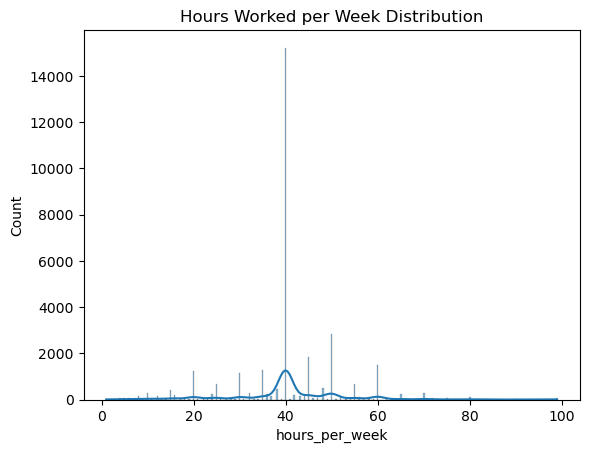

In [29]:
sns.histplot(data=df, x='hours_per_week', kde=True).set(title= 'Hours Worked per Week Distribution')

<Axes: >

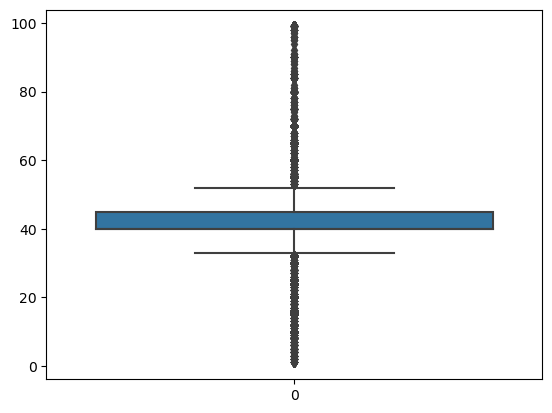

In [30]:
sns.boxplot(df.hours_per_week, orient="v")

Asymmetric distribution. Atypical values.

### Distribution of categorical variables

In [31]:
#workclass Distribution
df_workclass=df['workclass'].value_counts().sort_values(ascending=False).to_frame()
print(df_workclass)

                  workclass
Private               22696
Self-emp-not-inc       2541
Local-gov              2093
State-gov              1298
Self-emp-inc           1116
Federal-gov             960
Without-pay              14
Never-worked              7


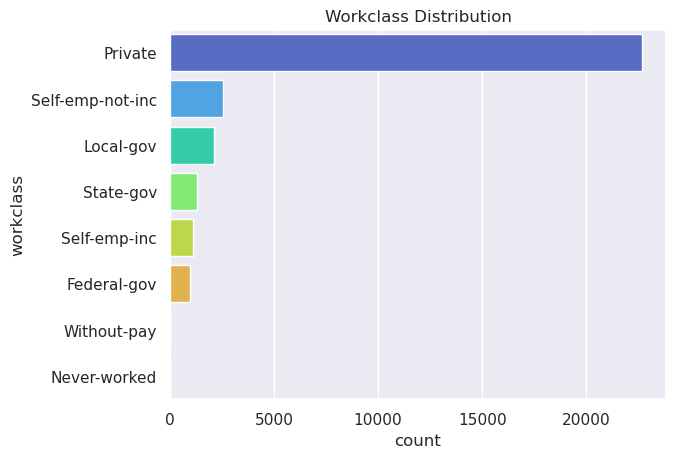

In [32]:
sns.set_theme(style="darkgrid")
sns.countplot( y='workclass', data=df, palette='turbo', order=df_workclass.index)
plt.title('Workclass Distribution')
plt.show()

In [33]:
#education Distribution
df_education=df['education'].value_counts().sort_values(ascending=False).to_frame()
print(df_education)

              education
HS-grad           10501
Some-college       7291
Bachelors          5355
Masters            1723
Assoc-voc          1382
11th               1175
Assoc-acdm         1067
10th                933
7th-8th             646
Prof-school         576
9th                 514
12th                433
Doctorate           413
5th-6th             333
1st-4th             168
Preschool            51


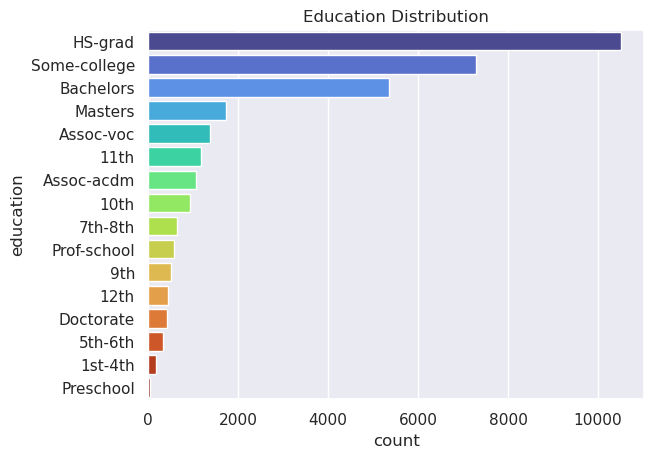

In [34]:
sns.set_theme(style="darkgrid")
sns.countplot(y='education', data=df, palette='turbo', order=df_education.index)
plt.title('Education Distribution')
plt.show()

In [35]:
#marital-status Distribution
df_marital_status=df['marital_status'].value_counts().sort_values(ascending=False).to_frame()
print(df_marital_status)

                       marital_status
Married-civ-spouse              14976
Never-married                   10683
Divorced                         4443
Separated                        1025
Widowed                           993
Married-spouse-absent             418
Married-AF-spouse                  23


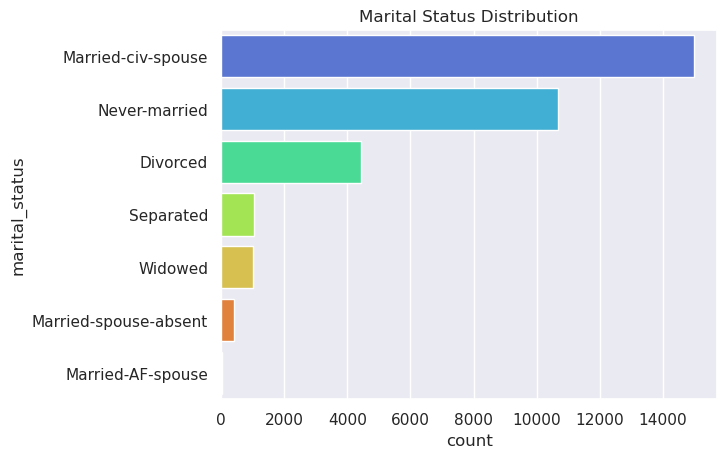

In [36]:
sns.set_theme(style="darkgrid")
sns.countplot(y='marital_status', data=df, palette='turbo', order=df_marital_status.index)
plt.title('Marital Status Distribution')
plt.show()

In [37]:
#occupation Distribution
df_occupation=df['occupation'].value_counts().sort_values(ascending=False).to_frame()
print(df_occupation)

                   occupation
Prof-specialty           4140
Craft-repair             4099
Exec-managerial          4066
Adm-clerical             3770
Sales                    3650
Other-service            3295
Machine-op-inspct        2002
Transport-moving         1597
Handlers-cleaners        1370
Farming-fishing           994
Tech-support              928
Protective-serv           649
Priv-house-serv           149
Armed-Forces                9


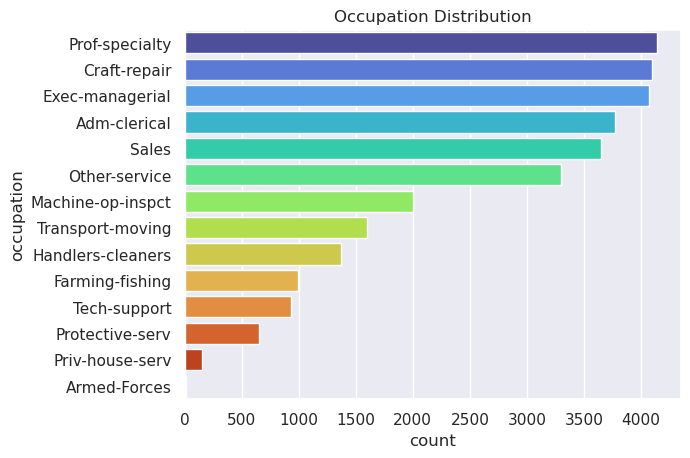

In [38]:
sns.set_theme(style="darkgrid")
sns.countplot(y='occupation', data=df, palette='turbo', order=df_occupation.index)
plt.title('Occupation Distribution')
plt.show()

In [39]:
#relationship Distribution
df_relationship=df['relationship'].value_counts().sort_values(ascending=False).to_frame()
print(df_relationship)

                relationship
Husband                13193
Not-in-family           8305
Own-child               5068
Unmarried               3446
Wife                    1568
Other-relative           981


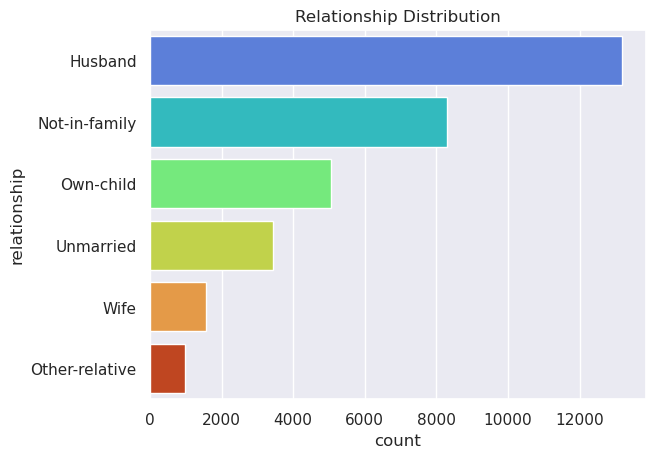

In [40]:
sns.set_theme(style="darkgrid")
sns.countplot(y='relationship', data=df, palette='turbo', order=df_relationship.index)
plt.title('Relationship Distribution')
plt.show()

In [41]:
#race Distribution
df_race=df['race'].value_counts().sort_values(ascending=False).to_frame()
print(df_race)

                     race
White               27816
Black                3124
Asian-Pac-Islander   1039
Amer-Indian-Eskimo    311
Other                 271


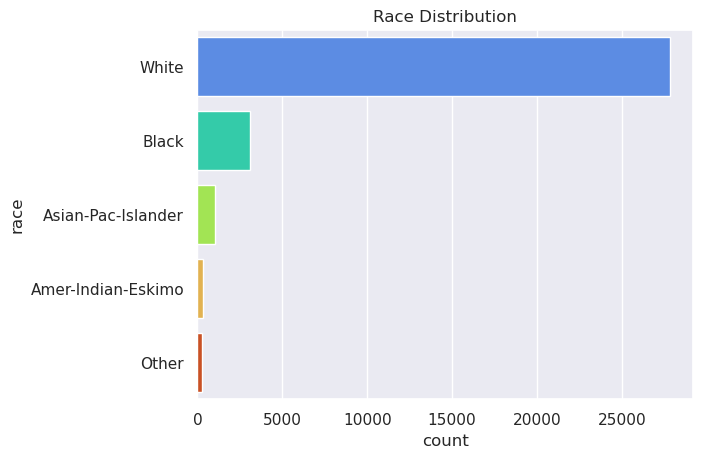

In [42]:
sns.set_theme(style="darkgrid")
sns.countplot(y='race', data=df, palette='turbo', order=df_race.index)
plt.title('Race Distribution')
plt.show()

In [43]:
#sex Distribution
df_sex=df['sex'].value_counts().sort_values(ascending=False).to_frame()
print(df_sex)

          sex
Male    21790
Female  10771


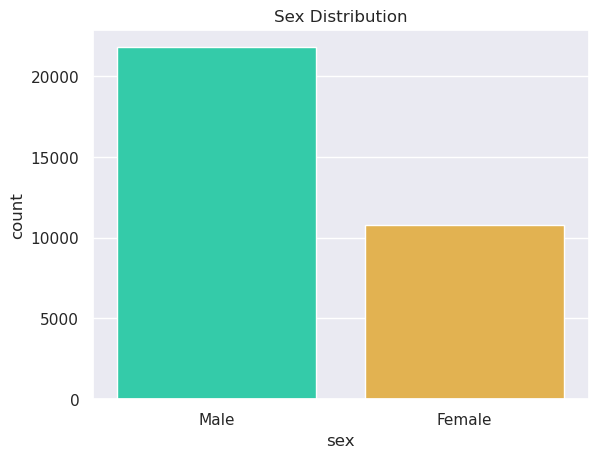

In [44]:
sns.set_theme(style="darkgrid")
sns.countplot(x='sex', data=df, palette='turbo', order=df_sex.index)
plt.title('Sex Distribution')
plt.show()

* There are twice as many men as women

In [45]:
#native-country
df_native_country=df['native_country'].value_counts().sort_values(ascending=False).to_frame()
print(df_native_country)

                            native_country
United-States                        29170
Mexico                                 643
Philippines                            198
Germany                                137
Canada                                 121
Puerto-Rico                            114
El-Salvador                            106
India                                  100
Cuba                                    95
England                                 90
Jamaica                                 81
South                                   80
China                                   75
Italy                                   73
Dominican-Republic                      70
Vietnam                                 67
Guatemala                               64
Japan                                   62
Poland                                  60
Columbia                                59
Taiwan                                  51
Haiti                                   44
Iran       

* 90% of people are from United States

In [46]:
#makes
df_makes=df['makes'].value_counts().sort_values(ascending=False).to_frame()
print(df_makes)

       makes
<=50K  24720
>50K    7841


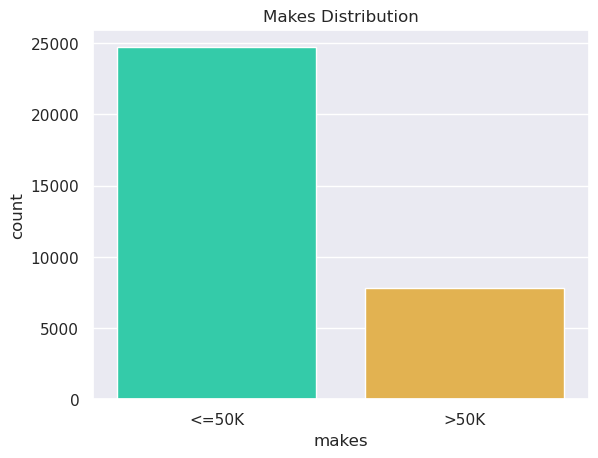

In [47]:
sns.set_theme(style="darkgrid")
sns.countplot(x='makes', data=df, palette='turbo', order=df_makes.index)
plt.title('Makes Distribution')
plt.show()

* Most people earn less than or equal to 50k

## 3.2 Bivariate Analysis

<Axes: xlabel='hours_per_week', ylabel='capital_gain'>

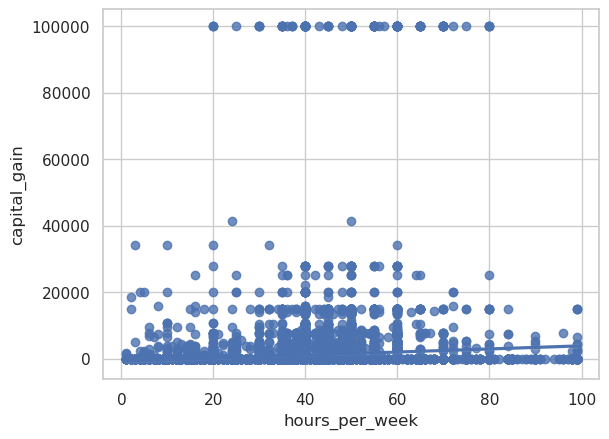

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.regplot(x="hours_per_week", y="capital_gain", data=df)

## 3.3 Multivariable Analysis

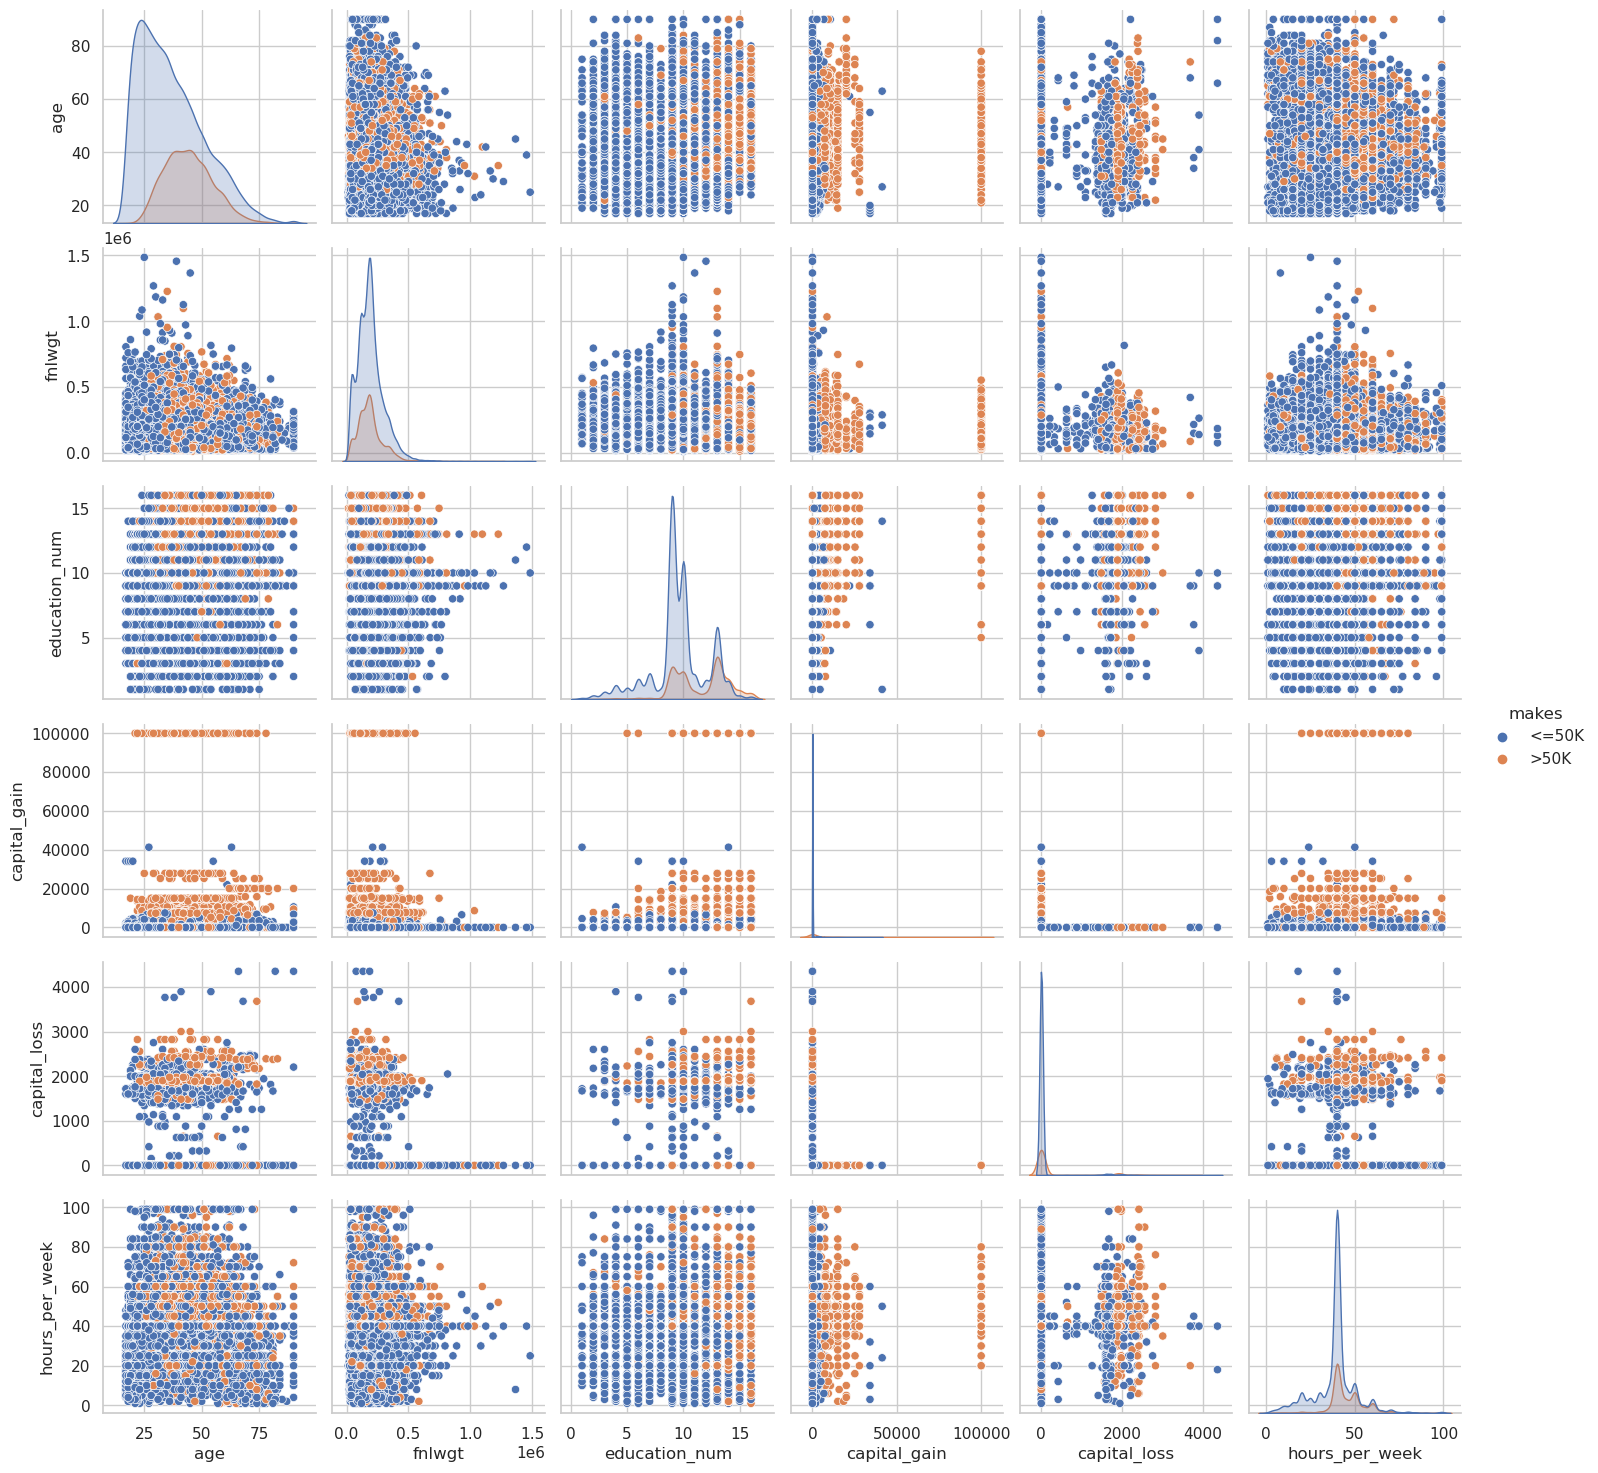

In [49]:
sns.pairplot(df, vars=["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"], hue="makes")
plt.show()

* No correlation can be found between the numerical variables.

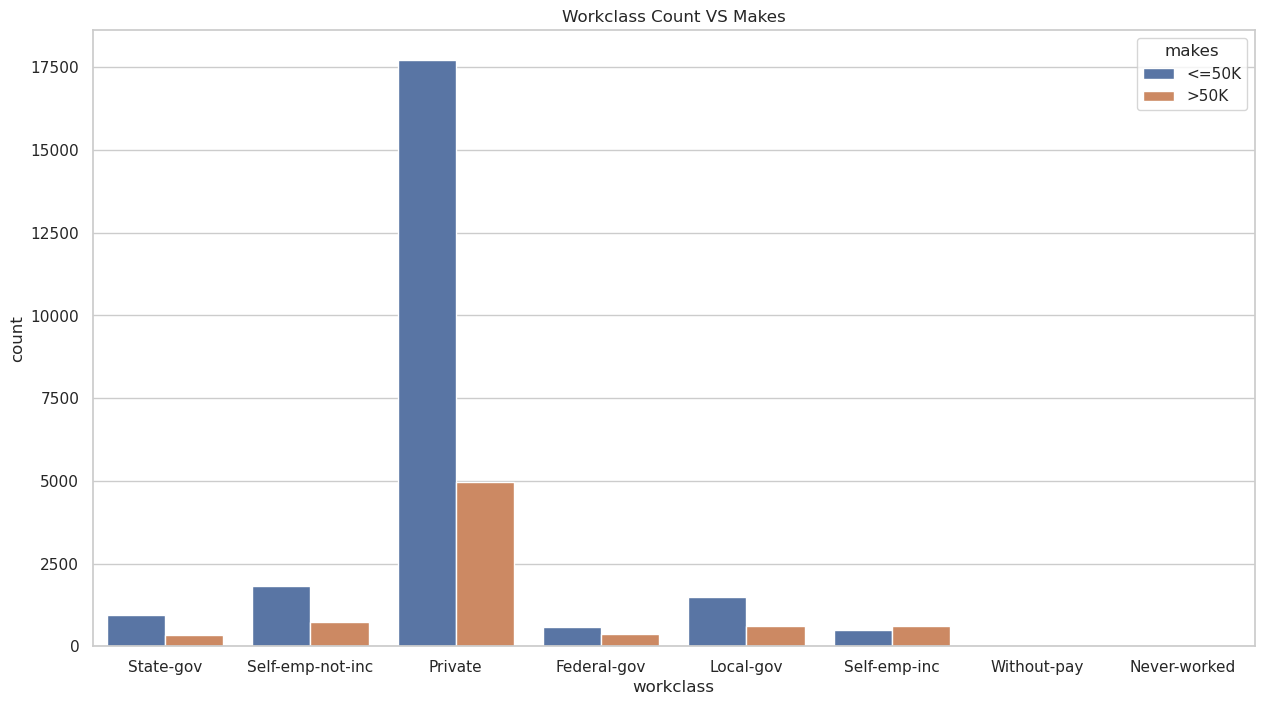

<Figure size 2500x1000 with 0 Axes>

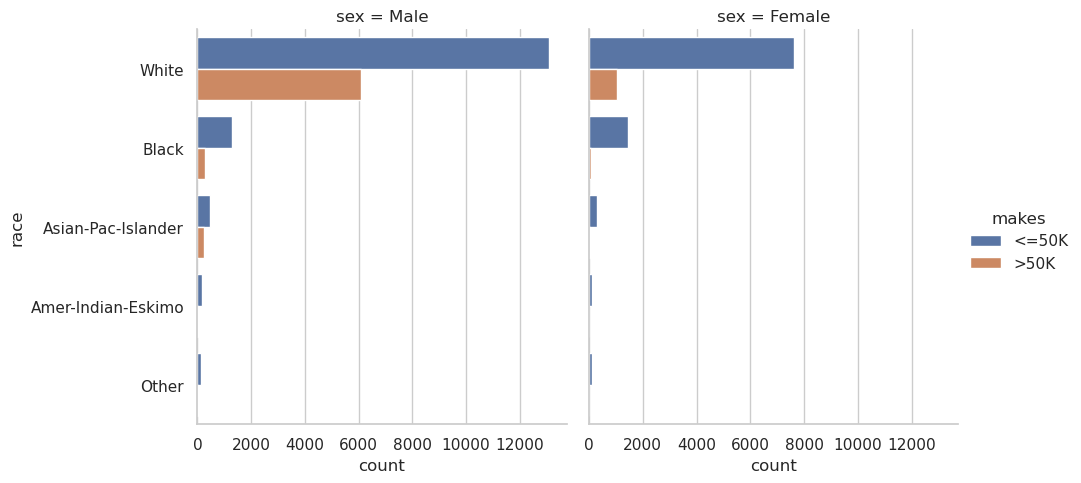

In [50]:
fig = plt.figure(figsize=(15,8))
sns.countplot(x='workclass',hue ='makes',data=df).set_title("Workclass Count VS Makes")


plt.figure(figsize=(25,10))
sns.catplot(y="race", hue="makes", kind="count",col="sex", data=df);

* Most people belong to the private workclass
* Most white women and men earn less than 50K

# 4. Data cleansing

## 4.1 Resolve null, invalid or missing values

In [51]:
#To see all rows that have missing values
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,makes
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,<=50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,NaN,<=50K
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
128,35,NaN,129305,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K


In [52]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
makes                0
dtype: int64

* The variable 'workclass' has 1836 missing data, which represents 5.6% of the total records.
* The variable 'occupation' has 1843 missing data, which represents 5.6% of the total records.
* The 'native_country' variable has 583 missing data, which represents 1.7% of the total records.

For numeric variables we can check the symmetry of each attribute and then decide whether to replace it with the mean (symmetric) or median (skew). However, this time the missing data is in categorical attributes, for this reason it can be replaced by the mode of that attribute.

In [53]:
#workclass
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [54]:
#to automatically calculate the most common type
df['workclass'].value_counts().idxmax()

'Private'

In [55]:
#We replace the missing values in 'workclass' with the most frequent value or the mode because 'private'
#represents 70% of the data, it is highly likely that the missing data is within this type.
df["workclass"].replace(np.nan, "Private", inplace=True)

In [56]:
print(df.isnull().sum())

age                  0
workclass            0
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
makes                0
dtype: int64


In [57]:
#occupation
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [58]:
#As the % of the unknown values of 'occupation' is 44% of the values of the most frequent type in this category, 
#it is difficult to assign a value to it. For this reason, it is preferable to remove all rows that have missing 
#data in the 'occupation' column.

df.dropna(subset=["occupation"], axis=0, inplace=True)

#Resets the index because we deleted some rows so that there are no jumps
df.reset_index(drop=True, inplace=True)

In [59]:
df.shape

(30718, 15)

In [60]:
print(df.isnull().sum())

age                 0
workclass           0
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation          0
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    556
makes               0
dtype: int64


In [61]:
#native_country
df['native_country'].value_counts()

United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France                      

In [62]:
#to automatically calculate the most common type
df['native_country'].value_counts().idxmax()

'United-States'

In [63]:
#We replace the missing values in 'native_country' with the most frequent value or the mode because 'United-States'
#represents 90% of the data, it is highly likely that the missing data is within this type.
df["native_country"].replace(np.nan, "United-States", inplace=True)

In [64]:
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
makes             0
dtype: int64


This is how we resolve missing, null or invalid data

## 4.2 Resolve duplicates values

In [65]:
print(df.duplicated())
print("Duplicate values:",df.duplicated().sum())

#Remove duplicate values
df=df.drop_duplicates()

0        False
1        False
2        False
3        False
4        False
         ...  
30713    False
30714    False
30715    False
30716    False
30717    False
Length: 30718, dtype: bool
Duplicate values: 24


In [66]:
print(df.duplicated())
print("Duplicate values:",df.duplicated().sum())

#New shape
print()
print("New Shape:", df.shape)

0        False
1        False
2        False
3        False
4        False
         ...  
30713    False
30714    False
30715    False
30716    False
30717    False
Length: 30694, dtype: bool
Duplicate values: 0

New Shape: (30694, 15)


This is how we resolve duplicated data

## 4.3 Delete columns

In [67]:
#Let's remove the 'fnlwgt' column as it does not contribute to the model and I can reduce my consumption of machine resources
df.drop("fnlwgt", axis=1, inplace=True)
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,makes
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 4.4 Resolve outliers

In [68]:
#The LOF algorithm will be applied to the numeric columns, this algorithm does not support missing data,
#eliminate the rows that constitute missing data and that negative values will be considered Outliers:

#We must import the scikit-learn library
from sklearn.neighbors import LocalOutlierFactor

#Find outliers
select_df = df[["age","education_num","capital_gain", "capital_loss", "hours_per_week"]]
model = LocalOutlierFactor(n_neighbors = 20, contamination=0.1)
y_pred = model.fit_predict(select_df)
outlier_index = (y_pred == -1) #negative values are outliers and positives inliers
outlier_values = select_df.iloc[outlier_index]

#Delete rows
delete_rows = df.drop([0,1], axis=0)
delete_rows.head(50)
delete_rows.reset_index(drop=True)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,makes
0,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
1,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
2,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
3,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30687,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30688,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30689,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30690,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [69]:
outlier_values.value_counts().sum()

3070

## 4.5 Resolve redundant data

/tmp/ipykernel_20/1646601647.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix=df.corr()


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

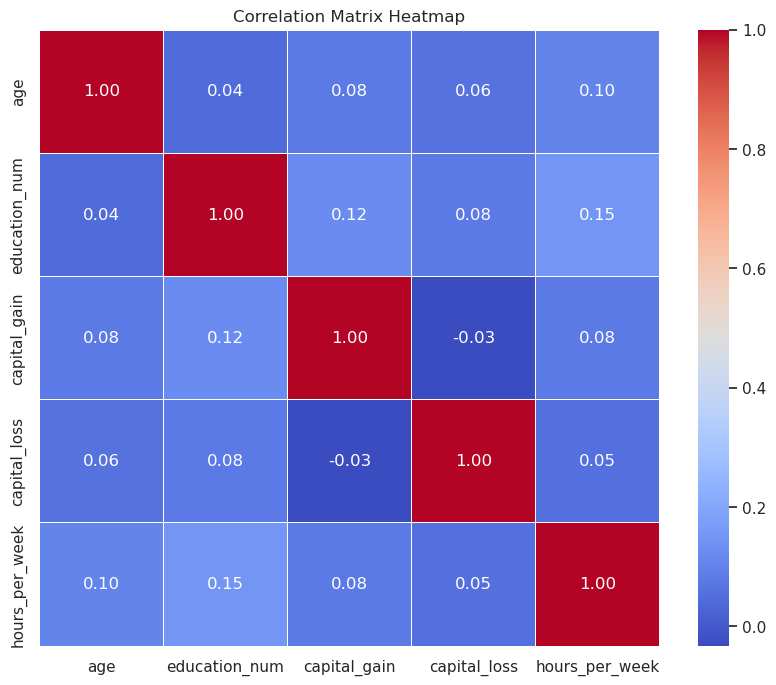

In [70]:
corrMatrix=df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")

* No correlation can be found between the numerical variables.

## 4.6 Normalize

Normalization is the process of transforming the values of some variables within a similar range.

In [71]:
#Normalization MN-MAX. We substitute the value directly in the column "capital_gain" and "capital_loss"
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['capital_gain']] = scaler.fit_transform(df[['capital_gain']])
df.head()
print(df[['capital_gain']])

df[['capital_loss']] = scaler.fit_transform(df[['capital_loss']])
df.head()
print(df[['capital_loss']])

       capital_gain
0          0.021740
1          0.000000
2          0.000000
3          0.000000
4          0.000000
...             ...
30713      0.000000
30714      0.000000
30715      0.000000
30716      0.000000
30717      0.150242

[30694 rows x 1 columns]
       capital_loss
0               0.0
1               0.0
2               0.0
3               0.0
4               0.0
...             ...
30713           0.0
30714           0.0
30715           0.0
30716           0.0
30717           0.0

[30694 rows x 1 columns]


In [72]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,makes
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,40,Cuba,<=50K


* Now the variables "capital_gain" and "capital_loss" have scales much closer to the rest of the characteristics

**It is also possible to do the normalization using: Z-SCORE.**

**For example:** 

    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    df[['columnName']] = scaler.fit_transform(df[['columnName']])

## 4.7 Discretize

Convert variables that are continuous to interval-grouped or categorical variables.

In [73]:
#The "age" variable will be discretized into 4 categories:
#Youth -> 0-18 years
#Young Adult -> 19-30
#Adult -> 31-50
#Older Adult -> 51-120

df['age_binned']=pd.cut(x = df['age'],
                        bins = [0,18,30,50,120], 
                        labels = ["Youth", "Young Adult", "Adult","Older Adult"])
df[['age']].head(10)
df[['age','age_binned']].head(10)

,age,age_binned
0,39,Adult
1,50,Adult
2,38,Adult
3,53,Older Adult
4,28,Young Adult
5,37,Adult
6,49,Adult
7,52,Older Adult
8,31,Adult
9,42,Adult


In [74]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,makes,age_binned
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,40,United-States,<=50K,Adult
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,13,United-States,<=50K,Adult
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,40,United-States,<=50K,Adult
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,40,United-States,<=50K,Older Adult
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,40,Cuba,<=50K,Young Adult


Text(0.5, 1.0, 'Age Binned')

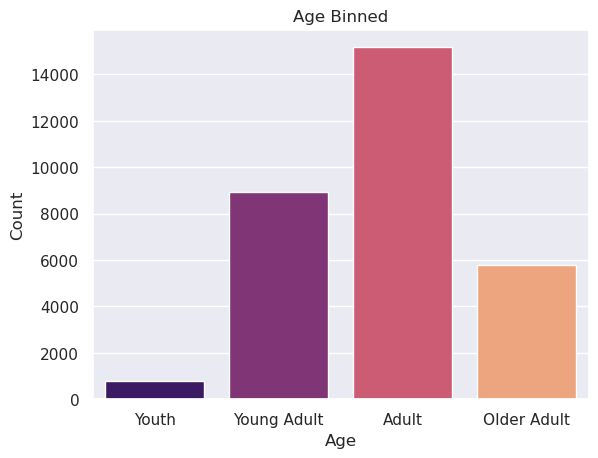

In [75]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

sns.set_theme(style="darkgrid")
sns.countplot(x="age_binned", data=df, palette="magma")
pyplot.xlabel("Age")
pyplot.ylabel("Count")
pyplot.title("Age Binned")

This is what the discretized age of people looks like.
* Most of the people are adults and young adults.

## 4.8 Numerize

Convert numeric variables to strings.

In [76]:
print(df[['sex']])

#The get_dummies function generates a column for each category of the variable with 0 and 1 if the value is there or not.
#The drop_first parameter leaves us with a single column
df = pd.get_dummies(df, columns = ["sex"], drop_first = True)
df.head(10)

          sex
0        Male
1        Male
2        Male
3        Male
4      Female
...       ...
30713  Female
30714    Male
30715  Female
30716    Male
30717  Female

[30694 rows x 1 columns]


,age,workclass,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,makes,age_binned,sex_Male
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0.021740,0.0,40,United-States,<=50K,Adult,1
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0.000000,0.0,13,United-States,<=50K,Adult,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0.000000,0.0,40,United-States,<=50K,Adult,1
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.000000,0.0,40,United-States,<=50K,Older Adult,1
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0.000000,0.0,40,Cuba,<=50K,Young Adult,0
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0.000000,0.0,40,United-States,<=50K,Adult,0
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,0.000000,0.0,16,Jamaica,<=50K,Adult,0
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,0.000000,0.0,45,United-States,>50K,Older Adult,1
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,0.140841,0.0,50,United-States,>50K,Adult,0
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0.051781,0.0,40,United-States,>50K,Adult,1


In [77]:
df[['sex_Male']]

,sex_Male
0,1
1,1
2,1
3,1
4,0
...,...
30713,0
30714,1
30715,0
30716,1


In [78]:
#Count the values in the new column
df["sex_Male"].value_counts()

1    20773
0     9921
Name: sex_Male, dtype: int64

* Notice that the sex column disappears as male and female

**Numerizing a categorical and ordinal column, which has multiple categories, the "df.replace" function is used**

**For example:**
    
    df["column1"].replace({"A":"1","B":"2","C":"3"}, inplace = True)

## 4.9 Add Derived Variables

Calculating a new variable from combining other existing variables.

In [79]:
#for the example we are going to subtract 'capital_gain' - 'capital_loss'
df['capital_net'] = df['capital_gain']-df['capital_loss']
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,makes,age_binned,sex_Male,capital_net
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0.02174,0.0,40,United-States,<=50K,Adult,1,0.02174
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0.00000,0.0,13,United-States,<=50K,Adult,1,0.00000
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0.00000,0.0,40,United-States,<=50K,Adult,1,0.00000
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.00000,0.0,40,United-States,<=50K,Older Adult,1,0.00000
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0.00000,0.0,40,Cuba,<=50K,Young Adult,0,0.00000


## 4.10 Oversampling y Undersampling

When there are unbalanced variables, oversampling or subsampling can be applied according to the data available.
This technique is applied especially on objective prediction variables. 

<Axes: title={'center': 'Count (Makes)'}>

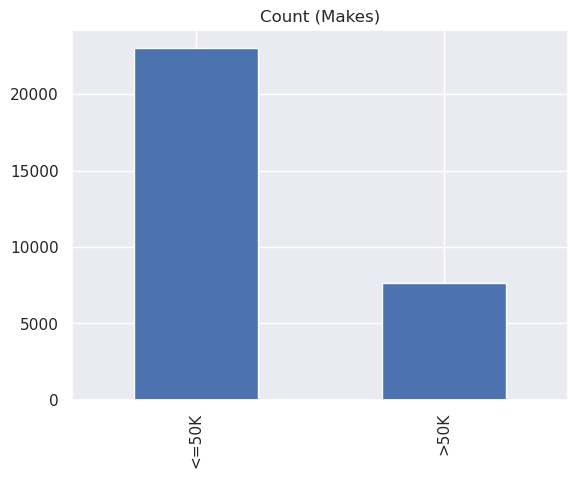

In [80]:
#We graph to see the unbalanced of the objective variable in our case is "makes"
target_count = df["makes"].value_counts()
target_count.plot(kind='bar', title='Count (Makes)')

In [81]:
#The amount of each class is stored in two separate variables.
#The classes are <=50K and >50K:
# Class count
count_max_50, count_min_50 = df["makes"].value_counts()
print("<=50K:", count_max_50)
print(">50K :", count_min_50)

<=50K: 23046
>50K : 7648


In [82]:
#The examples in the dataframe are divided into two using the classes as a partition:
# Divide by class
df_count_max_50 = df[df["makes"] == "<=50K"]
df_count_min_50 = df[df["makes"] == ">50K"]

The **df.sample** method will be used to obtain random samples from each class. In this case, there are 7.648 examples of the class >50K so if undersampling is applied, 7.648 random examples of the class <=50K are selected.

In [83]:
#Ramdom under-sampling. Randomly select the same number of examples as there are ">50K"
df_count_max_50_under = df_count_max_50.sample(count_min_50)
df_count_max_50_under.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,makes,age_binned,sex_Male,capital_net
8843,36,State-gov,Masters,14,Never-married,Prof-specialty,Own-child,White,0.0,0.0,40,United-States,<=50K,Adult,0,0.0
19604,71,Private,11th,7,Never-married,Priv-house-serv,Not-in-family,White,0.0,0.0,75,United-States,<=50K,Older Adult,0,0.0
24966,36,Private,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,0.0,0.0,30,United-States,<=50K,Adult,1,0.0
4289,25,Private,11th,7,Separated,Craft-repair,Own-child,White,0.0,0.0,40,United-States,<=50K,Young Adult,1,0.0
15751,29,Private,HS-grad,9,Divorced,Machine-op-inspct,Not-in-family,White,0.0,0.0,44,United-States,<=50K,Young Adult,1,0.0


In [84]:
#The two sets of examples are joined in a single dataframe, 
#in this case it would be a total of 15.296 examples:
df_test_under = pd.concat([df_count_max_50_under, df_count_min_50], axis=0)
df_test_under

,age,workclass,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,makes,age_binned,sex_Male,capital_net
8843,36,State-gov,Masters,14,Never-married,Prof-specialty,Own-child,White,0.000000,0.0,40,United-States,<=50K,Adult,0,0.000000
19604,71,Private,11th,7,Never-married,Priv-house-serv,Not-in-family,White,0.000000,0.0,75,United-States,<=50K,Older Adult,0,0.000000
24966,36,Private,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,0.000000,0.0,30,United-States,<=50K,Adult,1,0.000000
4289,25,Private,11th,7,Separated,Craft-repair,Own-child,White,0.000000,0.0,40,United-States,<=50K,Young Adult,1,0.000000
15751,29,Private,HS-grad,9,Divorced,Machine-op-inspct,Not-in-family,White,0.000000,0.0,44,United-States,<=50K,Young Adult,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30698,38,Private,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,0.150202,0.0,45,United-States,>50K,Adult,0,0.150202
30702,39,Local-gov,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,0.000000,0.0,20,United-States,>50K,Adult,0,0.000000
30711,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,0.000000,0.0,40,United-States,>50K,Older Adult,1,0.000000
30714,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0.000000,0.0,40,United-States,>50K,Adult,1,0.000000


<Axes: title={'center': 'Count (Makes)'}>

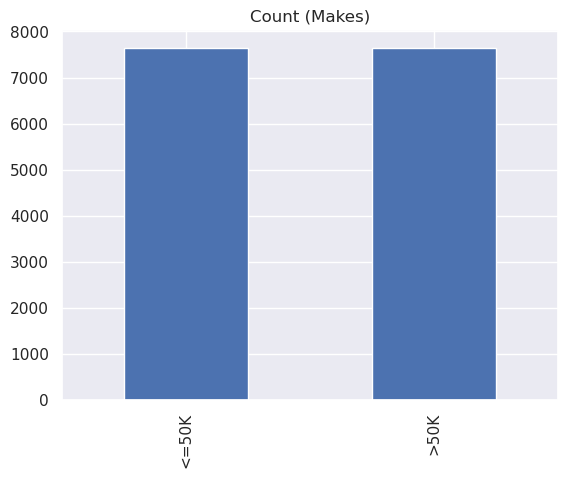

In [85]:
#The resulting dataframe is plotted, it can be seen that now the classes are balanced:
df_test_under["makes"].value_counts().plot(kind='bar', title='Count (Makes)')

## 4.11 Anonymization

Hide sensitive data that is being handled in a data set which I do not want to be revealed.

In [86]:
#As an example, the "relationship" characteristic will be hidden
#Notice how the data is initially found for the "relationship".
df.head(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,makes,age_binned,sex_Male,capital_net
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0.021740,0.0,40,United-States,<=50K,Adult,1,0.021740
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0.000000,0.0,13,United-States,<=50K,Adult,1,0.000000
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0.000000,0.0,40,United-States,<=50K,Adult,1,0.000000
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.000000,0.0,40,United-States,<=50K,Older Adult,1,0.000000
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0.000000,0.0,40,Cuba,<=50K,Young Adult,0,0.000000
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0.000000,0.0,40,United-States,<=50K,Adult,0,0.000000
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,0.000000,0.0,16,Jamaica,<=50K,Adult,0,0.000000
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,0.000000,0.0,45,United-States,>50K,Older Adult,1,0.000000
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,0.140841,0.0,50,United-States,>50K,Adult,0,0.140841
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0.051781,0.0,40,United-States,>50K,Adult,1,0.051781


In [87]:
df_relationship_count = df['relationship'].value_counts()
df_relationship_count

Husband           12698
Not-in-family      7852
Own-child          4521
Unmarried          3270
Wife               1435
Other-relative      918
Name: relationship, dtype: int64

Next, **"relationship"** is going to be encoded with numeric values. Using 0, 1, 2, 3... successively for each category. The **LabelEncoder()** class does most of the work for us.

In [88]:
pip install sklearn-pandas

Note: you may need to restart the kernel to use updated packages.


In [89]:
#The necessary libraries are imported
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelEncoder

#The column to be encoded is configured
encoders = [(["relationship"], LabelEncoder())]

#The tuples are mapped for the selected column
mapper = DataFrameMapper(encoders, df_out=True)

#Join the anonymized column with the rest of the dataframe
new_cols = mapper.fit_transform(df.copy())
df = pd.concat([df.drop(columns=["relationship"]), new_cols], axis="columns")

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [90]:
#Check how now the "relationship" column does not show the brand names but numbers.
df_makes_count = df['relationship'].value_counts()
df_makes_count

0    12698
1     7852
3     4521
4     3270
5     1435
2      918
Name: relationship, dtype: int64

I'm still learning, any suggestions or comments to improve will be appreciated! If you liked it and have any recommendations for other datasets I should look at, let me know in the comments ! Thanks for the support! :)

**Connect with me:** https://www.linkedin.com/in/julianacortesarboleda/